Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load

In [2]:
data1 = pd.read_csv("./files/edges/geolife.csv")
data2 = pd.read_csv("./files/edges/geolife_time_1min.csv")
data3 = pd.read_csv("./files/edges/geolife_time_30min.csv")
data4 = pd.read_csv("./files/edges/geolife_time_1day.csv")

data1_nodes = pd.read_csv("./files/nodes/nodes_geolife.csv")
data2_nodes = pd.read_csv("./files/nodes/nodes_geolife_time_1min.csv")
data3_nodes = pd.read_csv("./files/nodes/nodes_geolife_time_30min.csv")
data4_nodes = pd.read_csv("./files/nodes/nodes_geolife_time_1day.csv")
max_node_number1 = data1_nodes["Node"].max()

data5 = pd.read_csv("./files/edges/tdrive.csv")
data6 = pd.read_csv("./files/edges/tdrive_time_1min.csv")
data7 = pd.read_csv("./files/edges/tdrive_time_30min.csv")
data8 = pd.read_csv("./files/edges/tdrive_time_1day.csv")

data5_nodes = pd.read_csv("./files/nodes/nodes_tdrive.csv")
data6_nodes = pd.read_csv("./files/nodes/nodes_tdrive_time_1min.csv")
data7_nodes = pd.read_csv("./files/nodes/nodes_tdrive_time_30min.csv")
data8_nodes = pd.read_csv("./files/nodes/nodes_tdrive_time_1day.csv")
max_node_number2 = data5_nodes["Node"].max()

Function

In [3]:
def analyze(edges_df, nodes_df, node_max):
	merged_edges_df = pd.merge(nodes_df, edges_df, left_on="Node", right_on="Taxi1", how="left")
	merged_edges_df.fillna(0, inplace=True)

	all_numbers = pd.concat([edges_df['Taxi1'], edges_df['Taxi2']])
	most_common_number = all_numbers.mode().iloc[0]
	max_occurrences = all_numbers.value_counts().max()

	occurrences_counts = all_numbers.value_counts().reindex(range(1, node_max + 1), fill_value=0)
	least_common_number = occurrences_counts.idxmin()
	min_occurrences = occurrences_counts.loc[least_common_number]

	nodes_occurrences_df = pd.DataFrame({'Node': all_numbers.value_counts().index, 'Occurrences': all_numbers.value_counts().values})

	num_edges = len(edges_df)
	num_nodes = len(nodes_df)

	# Average number of edges per node
	avg_edges_per_node = (num_edges / node_max) * 2
	avg_edges_per_active_node = (num_edges / num_nodes) * 2

	print(f"Number of edges: {num_edges}")
	print(f"Number of nodes: {node_max}")
	print(f"Number of nodes with edges: {num_nodes}")
	print(f"Max number of edges from a node: Node {most_common_number} with {max_occurrences} edges")
	print(f"Min number of edges from a node: Node {least_common_number} with {min_occurrences} edges")
	print(f"Average number of edges per node: {avg_edges_per_node:.2f}")
	print(f"Average number of edges per active node: {avg_edges_per_active_node:.2f}")

	plt.figure(figsize=(10, 6))
	plt.bar(nodes_occurrences_df["Node"], nodes_occurrences_df["Occurrences"])
	plt.title("Nodes and Their Occurrences")
	plt.xlabel("Node number")
	plt.ylabel("Occurrences")
	plt.show()

	plt.figure(figsize=(10, 6))
	plt.hist(nodes_occurrences_df["Occurrences"], bins=20, color='blue', edgecolor='black')
	plt.title("Distribution of Node Occurrences")
	plt.xlabel("Number of edges for a node")
	plt.ylabel("Number of Nodes having that many edges")
	plt.show()

Analyze

Number of edges: 3724
Number of nodes: 5841
Number of nodes with edges: 2050
Max number of edges from a node: Node 1195 with 84 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 1.28
Average number of edges per active node: 3.63


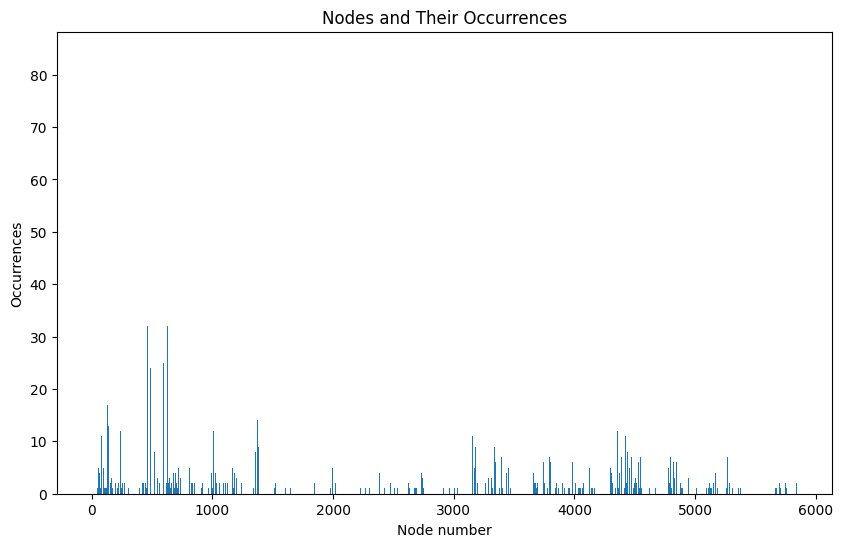

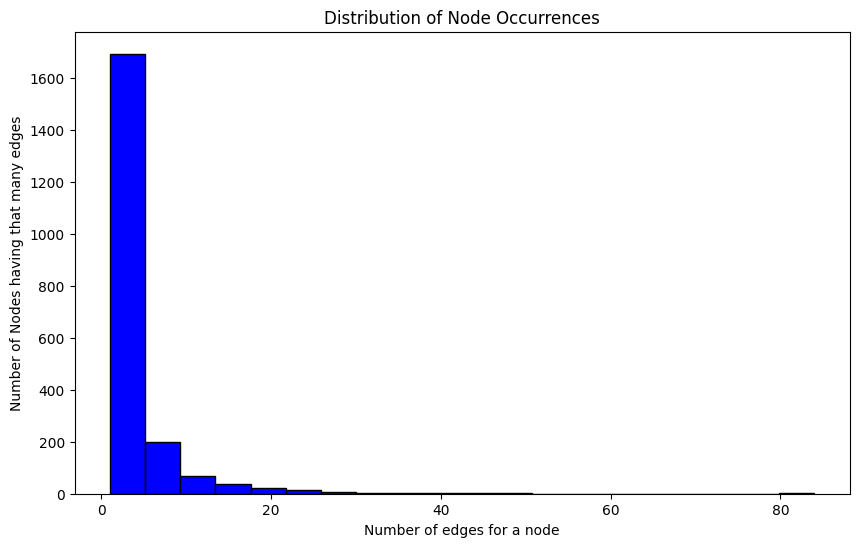

In [4]:
analyze(data1, data1_nodes, max_node_number1)

Number of edges: 134
Number of nodes: 5841
Number of nodes with edges: 268
Max number of edges from a node: Node 42 with 1 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.05
Average number of edges per active node: 1.00


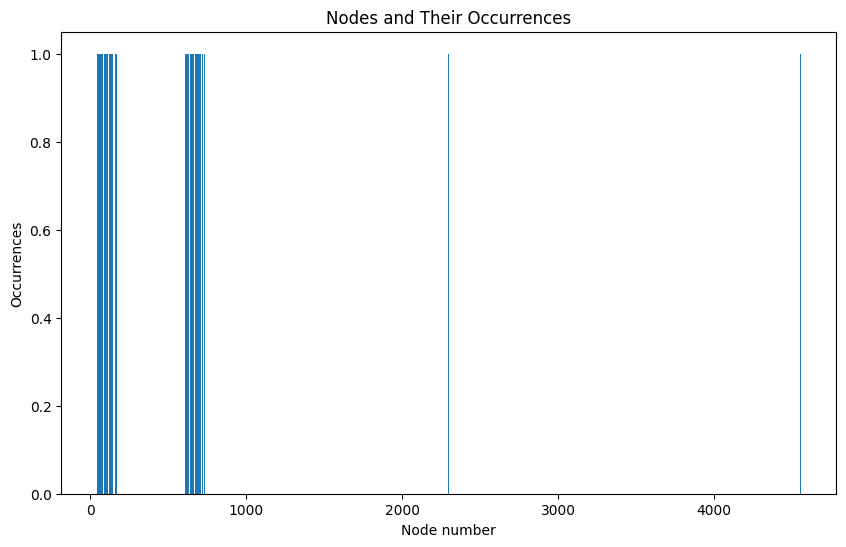

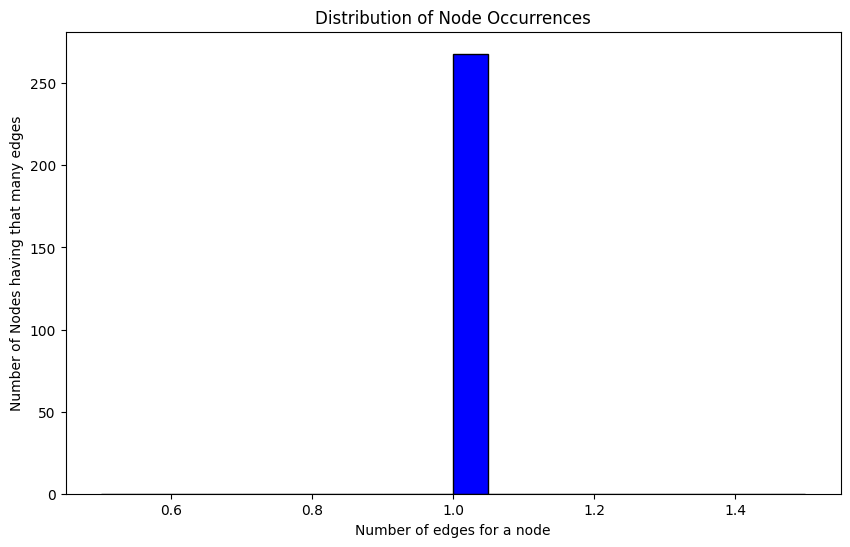

In [5]:
analyze(data2, data2_nodes, max_node_number1)

Number of edges: 134
Number of nodes: 5841
Number of nodes with edges: 268
Max number of edges from a node: Node 42 with 1 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.05
Average number of edges per active node: 1.00


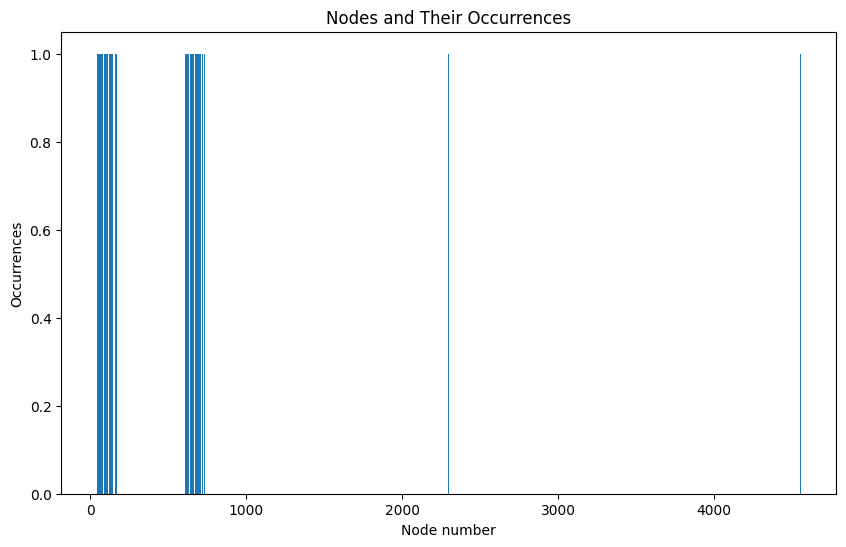

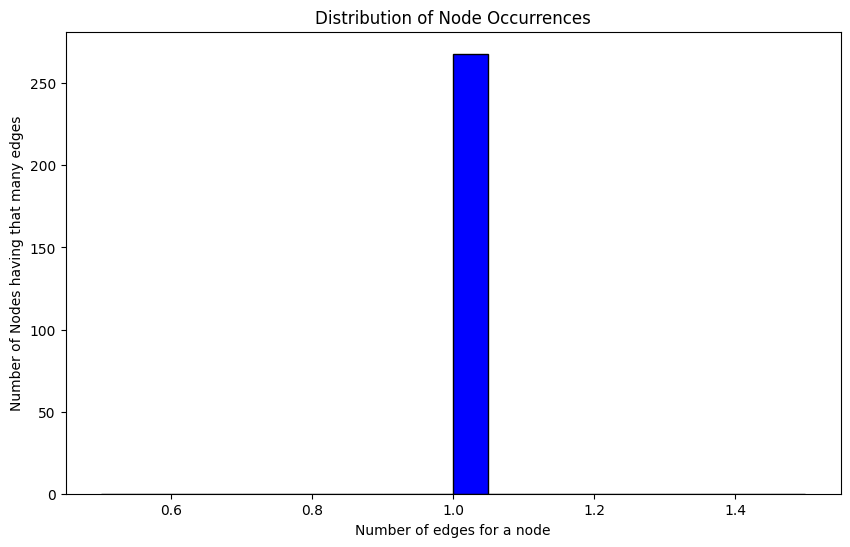

In [6]:
analyze(data3, data3_nodes, max_node_number1)

Number of edges: 185
Number of nodes: 5841
Number of nodes with edges: 348
Max number of edges from a node: Node 120 with 3 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.06
Average number of edges per active node: 1.06


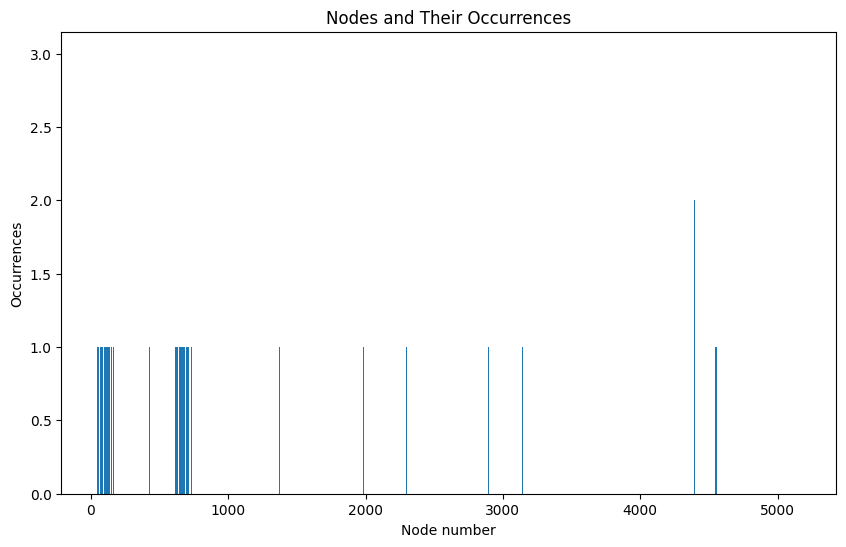

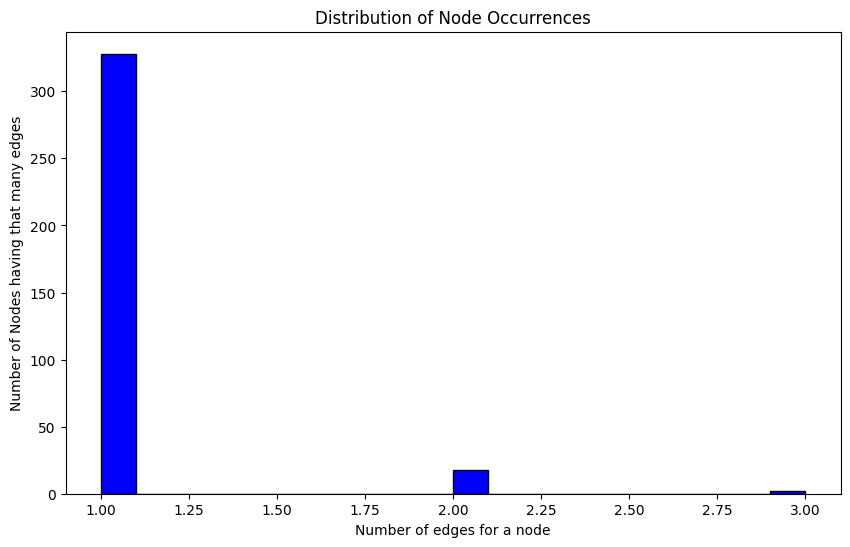

In [7]:
analyze(data4, data4_nodes, max_node_number1)

Number of edges: 406
Number of nodes: 10351
Number of nodes with edges: 497
Max number of edges from a node: Node 10002 with 26 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.08
Average number of edges per active node: 1.63


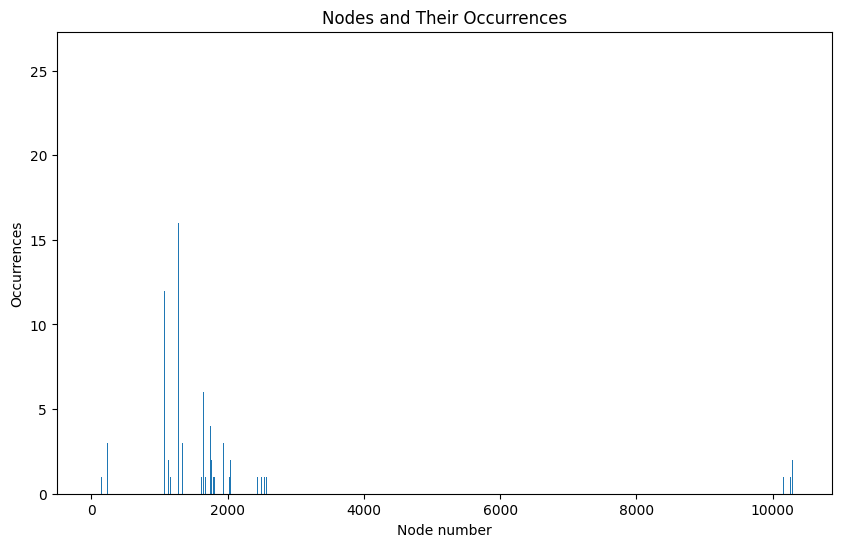

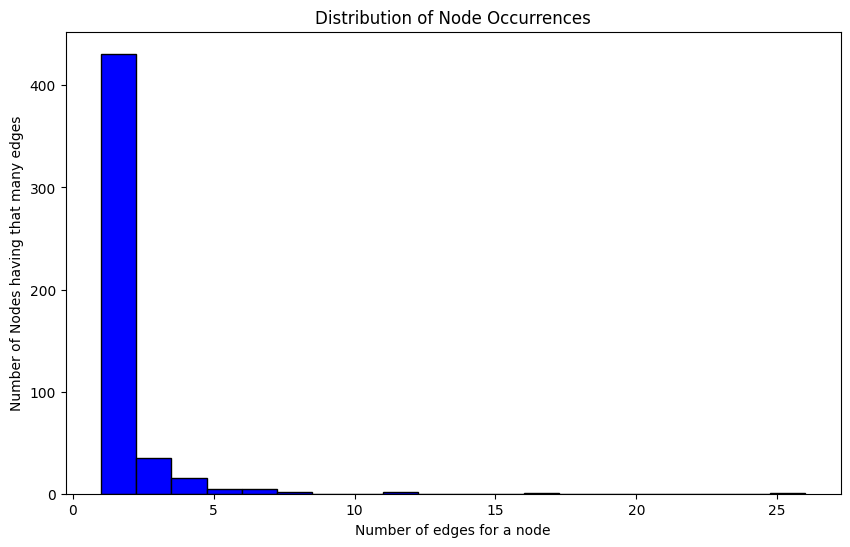

In [8]:
analyze(data5, data5_nodes, max_node_number2)

Number of edges: 1
Number of nodes: 10351
Number of nodes with edges: 2
Max number of edges from a node: Node 2033 with 1 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.00
Average number of edges per active node: 1.00


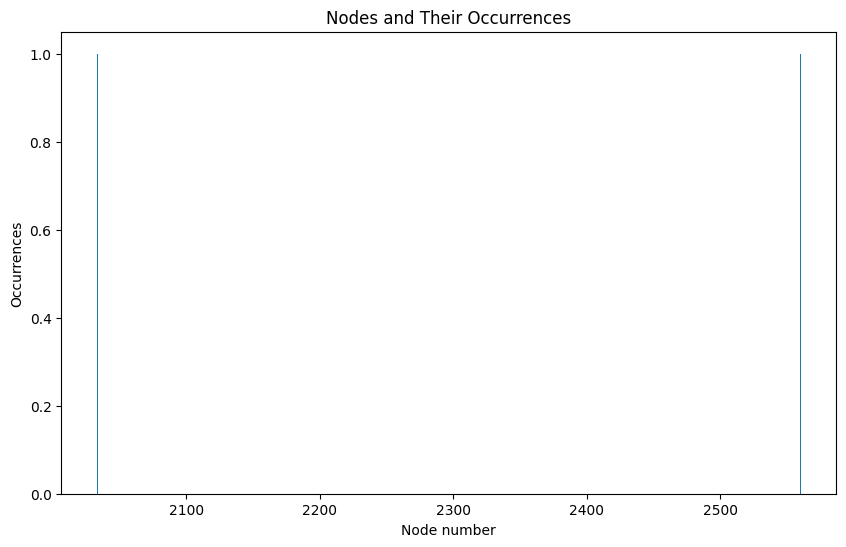

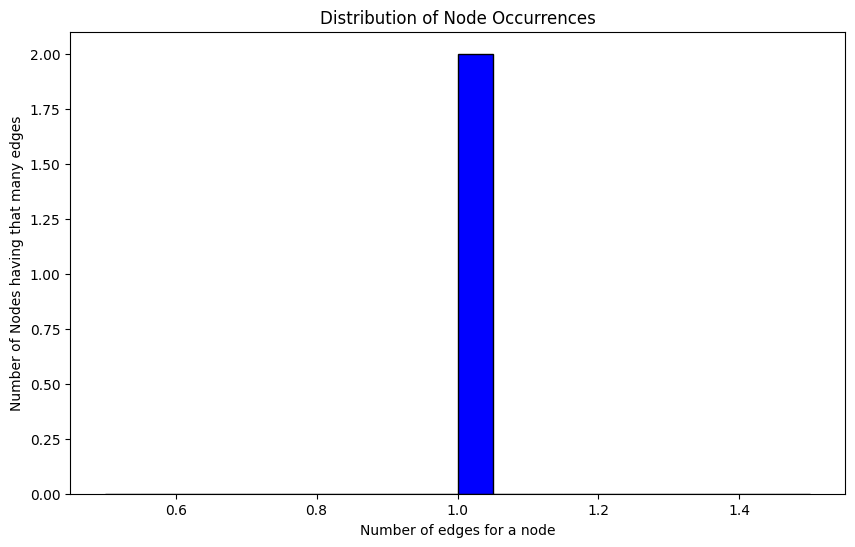

In [9]:
analyze(data6, data6_nodes, max_node_number2)

Number of edges: 6
Number of nodes: 10351
Number of nodes with edges: 12
Max number of edges from a node: Node 28 with 1 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.00
Average number of edges per active node: 1.00


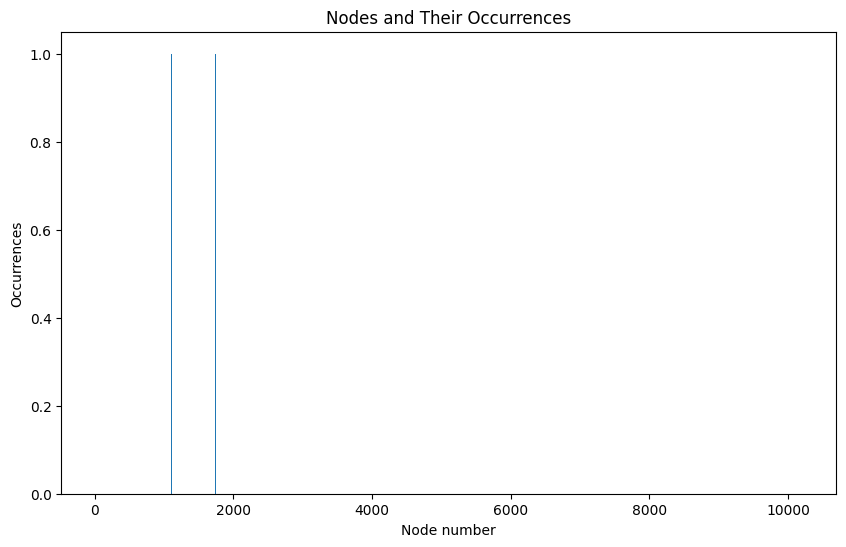

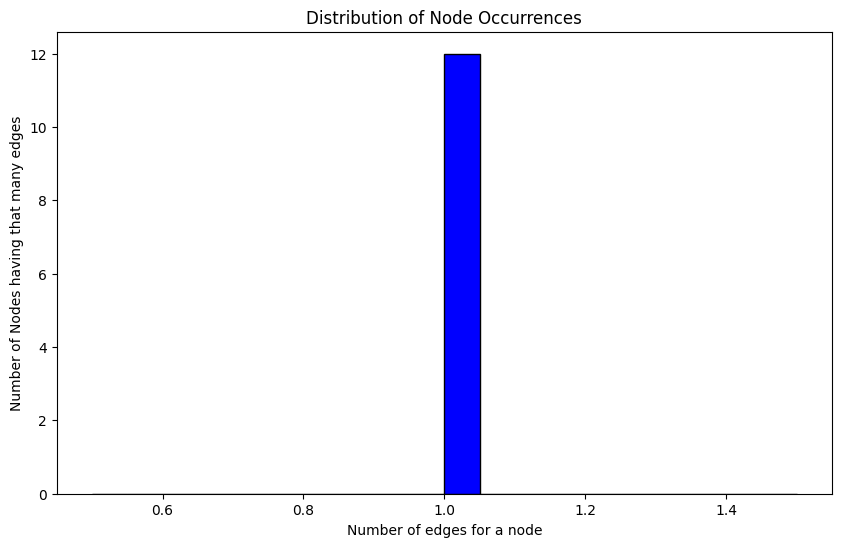

In [10]:
analyze(data7, data7_nodes, max_node_number2)

Number of edges: 103
Number of nodes: 10351
Number of nodes with edges: 162
Max number of edges from a node: Node 10002 with 7 edges
Min number of edges from a node: Node 1 with 0 edges
Average number of edges per node: 0.02
Average number of edges per active node: 1.27


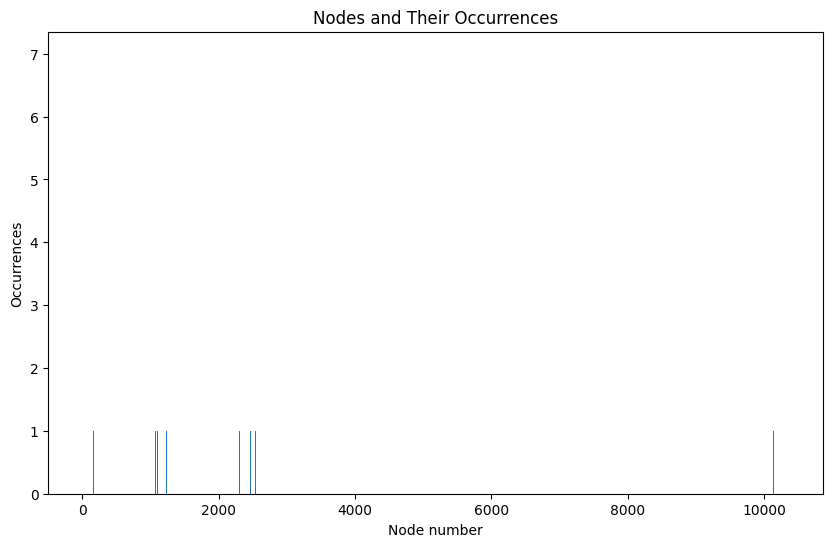

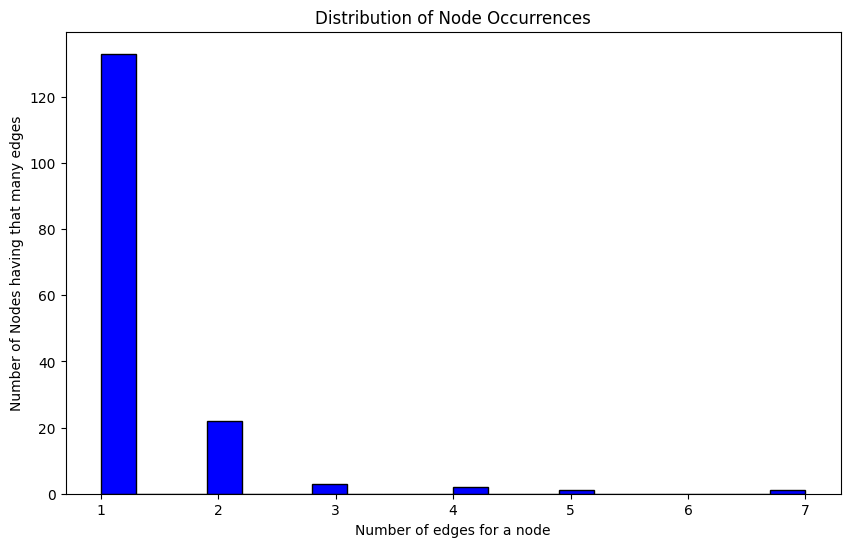

In [11]:
analyze(data8, data8_nodes, max_node_number2)